# Assessed Problem #3

$In\ this\ excercise\ I\ use\ the\ Curve\ Fit\ function\ to\ optimize\ two\ equations \ I\ chose\ to\ calculate\ the\ standard\ deviation\ using\ code\\ I\ had\ written\ instead\ of\ using\ a\ function\ in\ scipy\ or\ another\ module\ because\ I\ don't\ know\ what\ method\ is\ used\ to\ calculate\\ these\ values\ and\ as\ a\ result\ I\ can't\ 100\% \ rely \ that\ they\ are\ accurate \ at \ least \ if \ use \ my \ own \ algorithm \ I \ am \ responsible \ for \ any \ errors \ that \ are \\ present$

Populating the interactive namespace from numpy and matplotlib


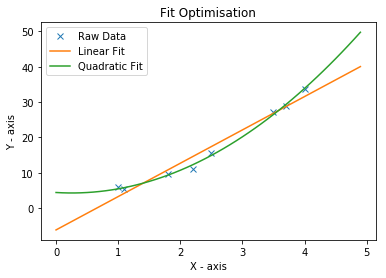

LinearDev: 1.088
QuadDev  : 1.088


In [6]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%pylab inline
#

# Function Definition
def linearfunction (x,a,b):
    return a*x+b
def quadraticfunction (x,a,b,c):
    return a*x**2+b*x+c
#

#Raw Data
x = [1.0  ,2.5   ,3.5   ,4.0   ,1.1  ,1.8  ,2.2   ,3.7   ]
y = [6.008,15.722,27.130,33.772,5.257,9.549,11.098,28.828]
#

#Optimize functions
linearCoeff, linearCov = optimize.curve_fit(linearfunction,x,y)
quadraticCoeff, quadraticCov = optimize.curve_fit(quadraticfunction,x,y)
#

#Create new ranges from the optimized functions
xnew = np.arange(0,5, 0.1)
ylin = linearfunction(xnew,linearCoeff[0],linearCoeff[1])
yquad = quadraticfunction(xnew,quadraticCoeff[0],quadraticCoeff[1],quadraticCoeff[2])
#

#Plot functions
plt.plot(x, y, 'x', label = "Raw Data")
plt.plot(xnew,ylin,'-', label = "Linear Fit")
plt.plot(xnew,yquad,'-', label = "Quadratic Fit")
plt.title("Fit Optimisation")
plt.legend()
plt.xlabel("X - axis")
plt.ylabel("Y - axis")
#

#Calculate Standard Deviations

Slin  = 0.
Squad = 0.
for i in range(len(x)):
    #Find the sum of the square errors
    Slin  += (y[i]-linearfunction(x[i],linearCoeff[0],linearCoeff[1]))**2
    Squad += (y[i]-quadraticfunction(x[i],quadraticCoeff[0],quadraticCoeff[1],quadraticCoeff[2]))**2
    #
LinearDev = np.sqrt(Slin / len(x))
QuadDev = np.sqrt(Squad / len(x))
#

#Outputs
plt.show()
print("LinearDev: " + str(np.round(LinearDev,3)))
print("QuadDev  : " + str(np.round(QuadDev,3)))
#

$from \ this \ code \ the \ curve \ fit \ function \ optimizes \ a \ quadratic \ curve \ to \ have \ a \ lower \ Standard \ Deviation \ than \ the \\ linear \ curve \ this \ suggests \ that \ the \ raw \ data \ better \ suits \ a \ quadratic \ relationship \ than \ a \ linear \ one$

Populating the interactive namespace from numpy and matplotlib


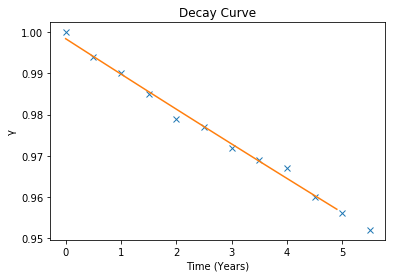

Halflife:     80.178

St.Deviation: 0.0011


In [21]:
# Librarys
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%pylab inline
#

# Function Definition
def decay (x,a,b):
    return a*np.exp(-b*x)
#

#Raw Data
x = [0    ,0.5  ,1    ,1.5  ,2    ,2.5  ,3    ,3.5  ,4    ,4.5  ,5    ,5.5  ]
y = [1.000,0.994,0.990,0.985,0.979,0.977,0.972,0.969,0.967,0.960,0.956,0.952]
#

#Optimize functions
decayCoeff, decayCov = optimize.curve_fit(decay,x,y)
#

#Create new range from the optimized function
xnew = np.arange(0,5, 0.1)
ydec = decay(xnew,decayCoeff[0],decayCoeff[1])
#

#Calculate Standard Deviations
Sdec  = 0.
for i in range(len(x)):
    #Find the sum of the square errors
    Sdec  += (y[i]-decay(x[i],decayCoeff[0],decayCoeff[1]))**2
    #
decDev = np.sqrt(Sdec / len(x))
#

#Calculate Half Life from Decay Coefficient
_hlife = np.log(2)/decayCoeff[1]
#

#Plot functions
plt.plot(x, y, 'x',xnew,ydec,'-')
plt.title("Decay Curve")
plt.xlabel("Time (Years)")
plt.ylabel("γ")
#

#Outputs
plt.show()
print("Halflife:     " + str(np.round(_hlife,3)))
print("")
print("St.Deviation: " + str(np.round(decDev,4)))
#

$ Notice \ that \ from \ the \ graph \ it \ appears \ that \ the \ trend \ is \ linear \ this \ indicates \ that \ there \ is \ not \ sufficient \ data \ to \ accurately \ extrapolate \ the \ data \\ also \ observe \ that \ the \ calculated \ half \ life \ is \ 16 \ times \ bigger \ than \ the \ range \ it \ was \ derived \ from$